In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import scanpy as sc
import seaborn as sns
from src.functions import *
from sklearn.cluster import KMeans

In [2]:
def load_intensities_r(path):
    intensities_df = pd.read_csv(path)
    intensities_df.index = [ CELL_PRE + str(i) for i in intensities_df.cell]
    intensities_df.pop('cell')
    return intensities_df


norm_ion_intensities = load_intensities_r('data/Mx_Co_Cultured/Martijns_results/raw_intensities_r.csv')
norm_cor_ion_intensities = load_intensities_r('data/Mx_Co_Cultured/Martijns_results/cor_intensities_r.csv')
norm_ion_intensities

,C10H10N2O3S,C10H10N2O4S,C12H13N3O4S,C12H20N3O6S,C13H16N2O5,C13H26O2,C14H20N2O3S,C14H20N2O4S,C14H20N2O6S,C14H21N3O3S,...,C45H78NO8P,C45H80NO8P,C45H82NO7P,C45H82NO8P,C46H77O10P,C46H81NO10P,C50H84NO10P,C6H11O8P,C6H13O9P,C9H19O11P
cell_11,13596.942837,1428.374145,257.718710,258.382738,532.464210,1630.750671,578.519208,1181.717813,1033.696410,1434.286616,...,0.000000,0.000000,0.0,0.000000,88.995720,0.000000,0.0,1625.245675,1010.626148,73.307538
cell_13,17654.766247,1880.534733,183.740493,420.055296,621.499988,1543.198687,735.354037,1476.546362,1506.155392,2116.281472,...,0.000000,84.813429,0.0,0.000000,44.391726,0.000000,0.0,1463.618128,991.468041,36.566344
cell_14,48103.515562,8488.243352,0.000000,2074.471824,1374.013035,4684.221454,3679.705746,3992.360861,4572.239969,4898.500689,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,4024.967368,2035.756582,254.250992
cell_15,22149.050153,2361.409135,138.479695,564.432243,702.834436,1486.665628,925.011366,1823.570861,2035.854376,2827.917945,...,0.000000,160.379531,0.0,0.000000,0.000000,0.000000,0.0,1379.887073,992.933110,8.551342
cell_16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_1500,10701.895831,1101.893837,134.157146,239.231573,262.306583,1286.097404,805.346227,1383.412538,831.952342,1671.919473,...,70.140030,126.567459,0.0,46.292104,199.604745,0.000000,0.0,3148.801630,2000.761016,171.809511
cell_1503,19519.458088,1908.879050,278.449393,462.339920,294.247201,1673.570264,1440.440812,1884.370527,1542.336463,3168.284953,...,22.741879,115.893733,0.0,0.000000,0.000000,0.000000,0.0,3769.482602,2024.170092,155.397445
cell_1510,8309.413000,777.507100,54.968914,0.000000,68.589830,1171.566900,582.492700,802.662400,265.930880,1357.944200,...,184.746340,134.135090,0.0,403.948850,0.000000,200.954740,0.0,7431.572300,3101.317100,669.905700
cell_1512,8589.597374,819.077090,65.518132,31.559978,92.287020,1188.405319,612.695062,875.897000,333.894219,1393.416394,...,163.851804,128.216109,0.0,358.262836,28.283388,178.227058,0.0,6949.985265,2990.516346,608.918451


In [3]:
norm_ion_intensities = pd.read_pickle('data/Mx_Co_Cultured/normalized_ion_intensities.pkl')
norm_cor_ion_intensities = pd.read_pickle('data/Mx_Co_Cultured/normalized_corrected_ion_intensities.pkl')
norm_ion_intensities


,C10H10N2O3S,C10H10N2O4S,C12H13N3O4S,C12H20N3O6S,C13H16N2O5,C13H26O2,C14H20N2O3S,C14H20N2O4S,C14H20N2O6S,C14H21N3O3S,...,C45H78NO8P,C45H80NO8P,C45H82NO7P,C45H82NO8P,C46H77O10P,C46H81NO10P,C50H84NO10P,C6H11O8P,C6H13O9P,C9H19O11P
cell_11,13596.942837,1428.374145,257.718710,258.382738,532.464210,1630.750671,578.519208,1181.717813,1033.696410,1434.286616,...,0.000000,0.000000,0.0,0.000000,88.995720,0.000000,0.0,1625.245675,1010.626148,73.307538
cell_13,17670.517637,1882.289900,183.453329,420.682866,621.845601,1542.858834,735.962828,1477.690808,1507.989352,2118.928795,...,0.000000,85.142653,0.0,0.000000,44.218585,0.000000,0.0,1462.990732,991.393674,36.423724
cell_14,48103.515562,8488.243352,0.000000,2074.471824,1374.013035,4684.221454,3679.705746,3992.360861,4572.239969,4898.500689,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,4024.967368,2035.756582,254.250992
cell_15,22089.693860,2357.389425,134.785602,566.584494,703.782218,1482.680216,920.639606,1816.590522,2028.107047,2823.634960,...,0.000000,161.531269,0.0,0.000000,0.000000,0.000000,0.0,1369.842586,990.259174,7.437679
cell_16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_1500,10713.040133,1107.562673,136.006934,244.460251,264.382746,1290.608465,811.149315,1392.181825,836.535349,1671.875419,...,60.929401,120.688745,0.0,40.213130,206.232707,0.000000,0.0,3152.038702,2016.633720,166.406591
cell_1503,19538.958672,1901.465852,274.487016,460.774021,299.667851,1673.652219,1447.091279,1890.548047,1553.920692,3192.398314,...,20.251164,116.953610,0.0,0.000000,0.000000,0.000000,0.0,3778.147267,2027.692022,156.318160
cell_1510,8309.413000,777.507100,54.968914,0.000000,68.589830,1171.566900,582.492700,802.662400,265.930880,1357.944200,...,184.746340,134.135090,0.0,403.948850,0.000000,200.954740,0.0,7431.572300,3101.317100,669.905700
cell_1512,8588.415299,818.901710,65.473625,31.426829,92.187044,1188.334279,612.567640,875.588029,333.607487,1393.266740,...,163.939956,128.241081,0.0,358.455581,28.164063,178.322944,0.0,6952.017040,2990.983805,609.175751


HeLa      715
NIH3T3    492
Name: celltype, dtype: int64


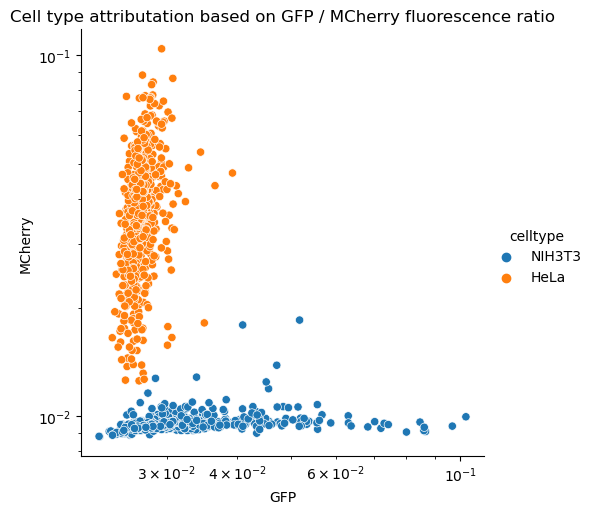

In [4]:
condition_metadata = pd.read_csv('data/Mx_Co_Cultured/MORPHnMOL.csv')
condition_metadata.index = [CELL_PRE + str(i) for i in condition_metadata.ObjectNumber]
condition_metadata['GFP'] = condition_metadata.Intensity_MeanIntensity_GFP_quantif
condition_metadata['MCherry'] = condition_metadata.Intensity_MeanIntensity_mCherry_quantif
condition_metadata['fluorescence_ratio'] = np.log(condition_metadata.GFP / condition_metadata.MCherry)

#condition_metadata['celltype'] = 'HeLa' if condition_metadata.fluorescence_ratio < 0.8 else 'NIH3T3'
condition_metadata['celltype'] = np.where(condition_metadata.fluorescence_ratio < 0.8, 'HeLa', 'NIH3T3')

print(condition_metadata['celltype'].value_counts())

plot = sns.relplot(data=condition_metadata, x='GFP', y='MCherry', hue='celltype')
plot.set(xscale='log')
plot.set(yscale='log')
plot.set(title='Cell type attributation based on GFP / MCherry fluorescence ratio')

In [5]:
obs = condition_metadata[['ObjectNumber', 'celltype', 'GFP', 'MCherry', 'fluorescence_ratio']]

# condition_metadata.index = condition_metadata.index.map(str)
# norm_ion_intensities.index = norm_ion_intensities.index.map(str)

In [6]:
included_cells = norm_ion_intensities.index.intersection(obs.index)
all_molecules = norm_ion_intensities.columns
included_molecules = norm_ion_intensities.columns.intersection(condition_metadata.columns)



adata = ad.AnnData(X=norm_ion_intensities.loc[included_cells, all_molecules], obs=obs.loc[included_cells])
adata_cor = ad.AnnData(X=norm_cor_ion_intensities.loc[included_cells, all_molecules], obs=obs.loc[included_cells])

print(adata.shape)
print(adata_cor.shape)

(1207, 104)
(1207, 104)


/Users/mariusklein/opt/anaconda3/envs/ion_suppression/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  import sys
/Users/mariusklein/opt/anaconda3/envs/ion_suppression/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  


In [7]:
excluded_molecules = all_molecules.difference(included_molecules)
excluded_molecules

Index(['C10H10N2O3S', 'C10H10N2O4S', 'C12H13N3O4S', 'C12H20N3O6S',
       'C13H16N2O5', 'C13H26O2', 'C14H20N2O3S', 'C14H20N2O4S', 'C14H20N2O6S',
       'C14H21N3O3S', 'C14H23N2O8', 'C14H28O2', 'C14H29NaO4S', 'C15H18O12',
       'C15H22O2', 'C15H30O2', 'C16H12N2', 'C16H15F2N3Si', 'C16H32O2',
       'C17H17ClN4', 'C18H13N3O', 'C20H12N2O2', 'C20H14N4', 'C20H18N4O2',
       'C20H32N5O8P', 'C21H20N4O2', 'C25H34O3', 'C25H36O2', 'C25H36O3',
       'C26H31NO11', 'C27H46O4', 'C34H38O16', 'C34H70NO6P', 'C39H36N4O7',
       'C39H78NO8P', 'C41H79O13P', 'C41H82NO7P', 'C42H79O10P', 'C43H74NO7P',
       'C43H74NO8P', 'C45H76NO7P', 'C45H78NO7P', 'C45H82NO7P', 'C46H77O10P',
       'C46H81NO10P', 'C50H84NO10P'],
      dtype='object')

In [8]:
def preprocess(adata):
    sc.pp.filter_cells(adata, min_genes=5)
    sc.pp.filter_genes(adata, min_cells=1)
    #sc.pp.log1p(adata)
    sc.pp.scale(adata)

preprocess(adata)
preprocess(adata_cor)


print(adata.shape)
print(adata_cor.shape)


(1137, 104)
(1137, 103)


In [9]:
def subset_molecules(adata):
    return adata[:, included_molecules]

adata = subset_molecules(adata)
adata_cor = subset_molecules(adata_cor)

print(adata.shape)
print(adata_cor.shape)

(1137, 58)
(1137, 58)


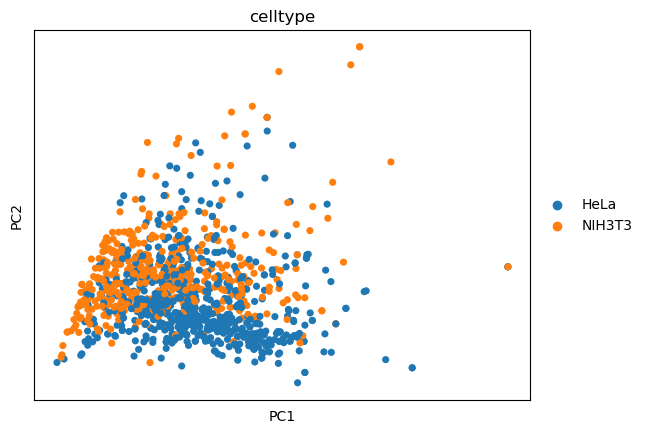

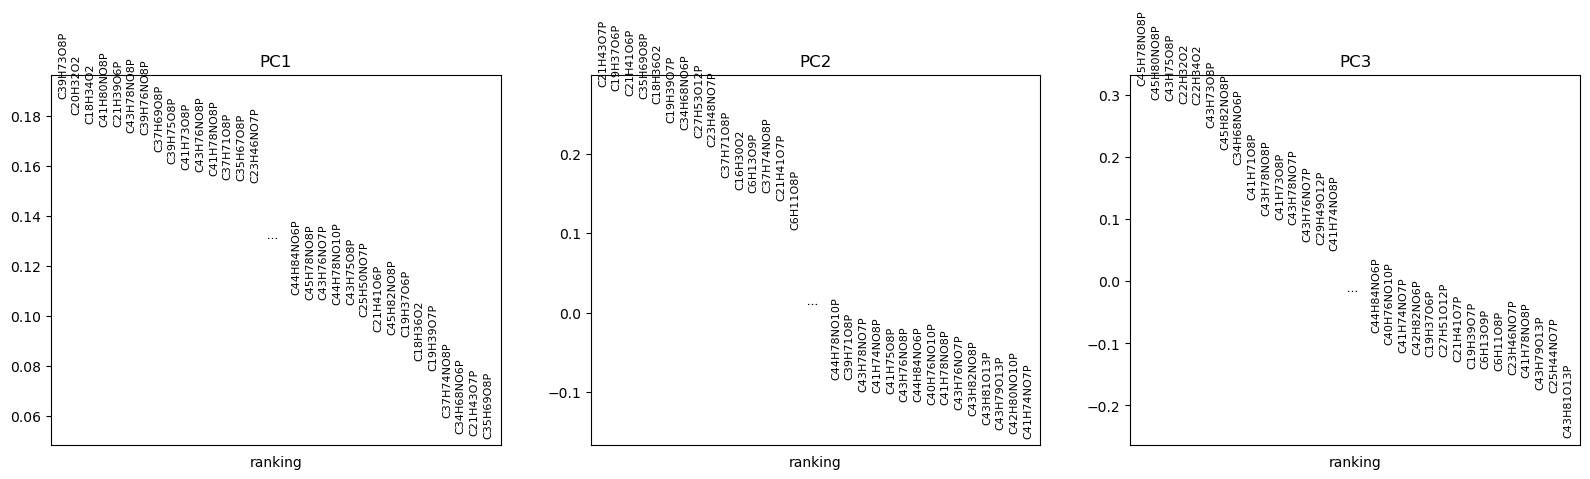

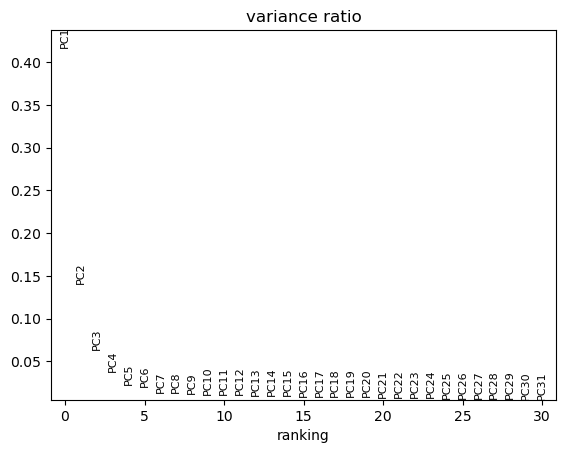

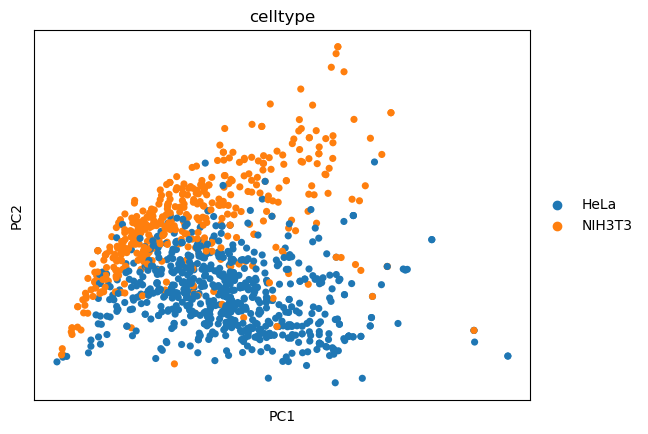

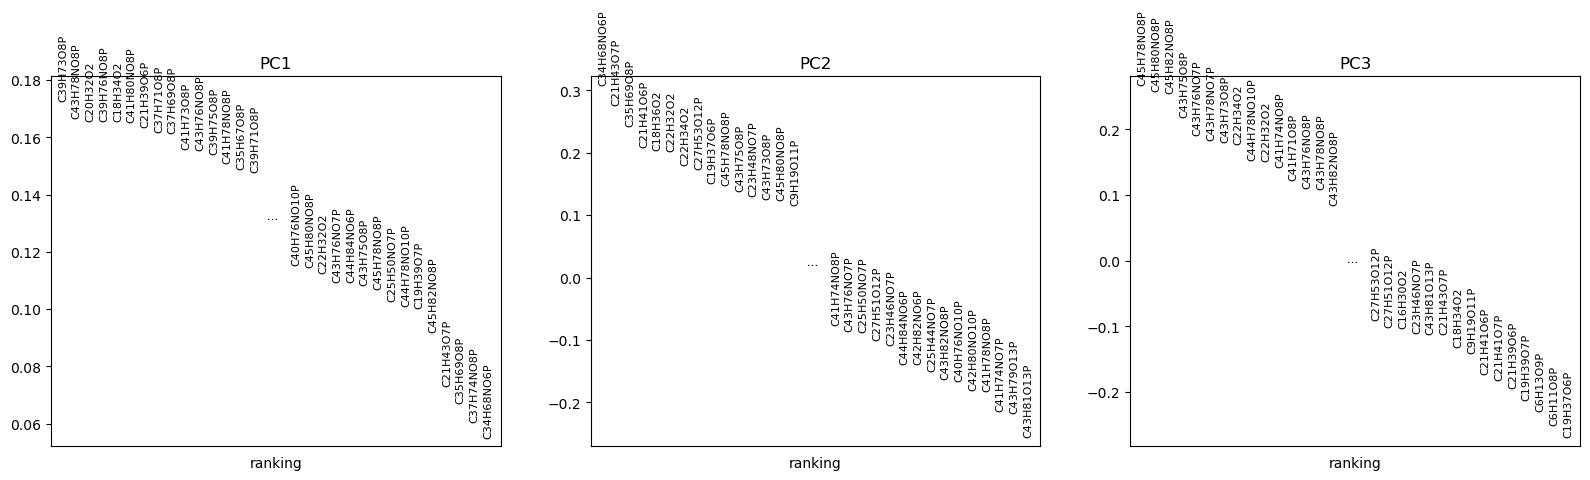

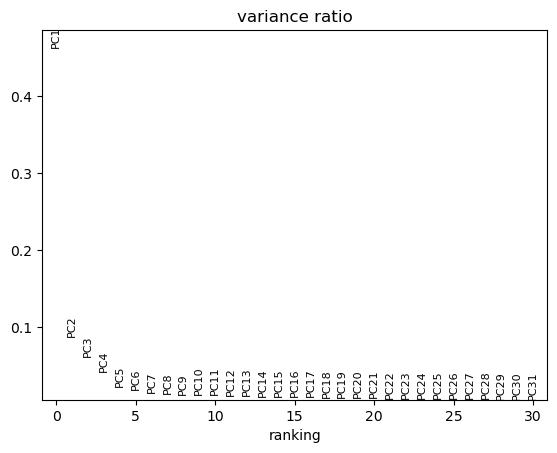

In [10]:
def dimred_pca(adata):
    sc.pp.pca(adata)
    sc.pl.pca_overview(adata, color='celltype')

dimred_pca(adata)
dimred_pca(adata_cor)

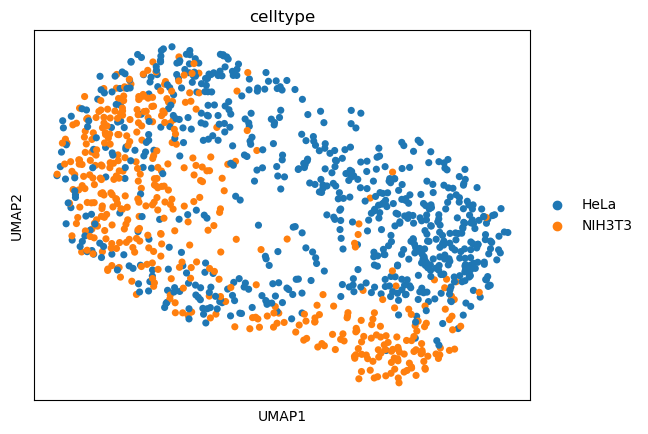

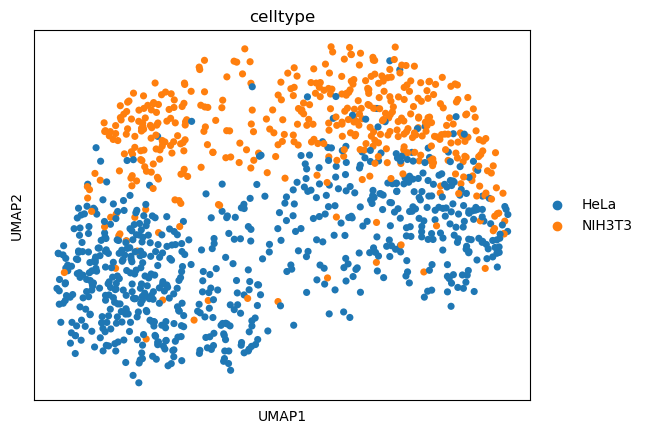

In [11]:
def dimred_umap(adata, min_dist = 0.4):
    sc.pp.neighbors(adata, n_neighbors=200, metric='cosine')
    sc.tl.umap(adata, min_dist=min_dist, spread=1.0, random_state=1, n_components=2)
    sc.pl.umap(adata, color='celltype')

dimred_umap(adata)
dimred_umap(adata_cor)


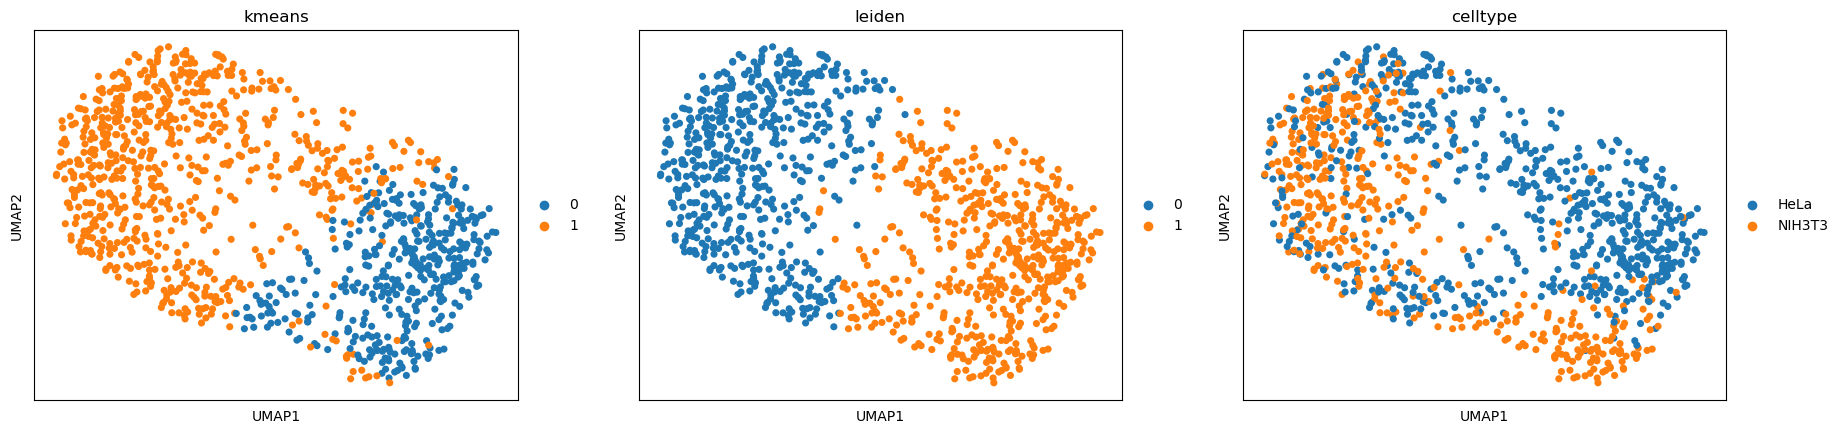

Leiden acccuracy score: 0.3764
KMeans completeness score: 0.0199


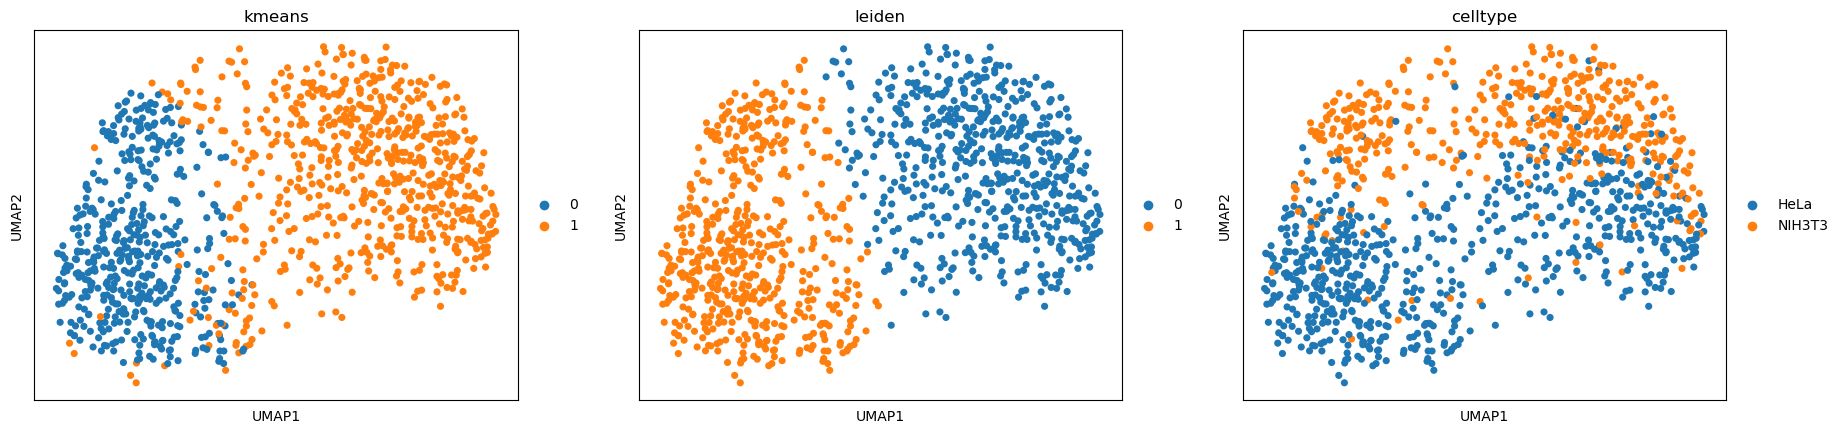

Leiden acccuracy score: 0.3870
KMeans completeness score: 0.0370


In [12]:
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics import accuracy_score

def kmeans_clust(adata):
    kmeans = KMeans(n_clusters=2, random_state=0).fit(adata.X)
    adata.obs['kmeans'] = kmeans.labels_.astype(str)

    sc.tl.leiden(adata, resolution=0.2)

    sc.pl.umap(adata, color=['kmeans', 'leiden', 'celltype'])
    print('Leiden acccuracy score: %1.4f' % accuracy_score(y_true = adata.obs['celltype'].replace(['HeLa', 'NIH3T3'], ['0', '1']), y_pred = adata.obs['leiden']))
    print('KMeans completeness score: %1.4f' % completeness_score(adata.obs['celltype'], adata.obs['kmeans']))

kmeans_clust(adata)
kmeans_clust(adata_cor)


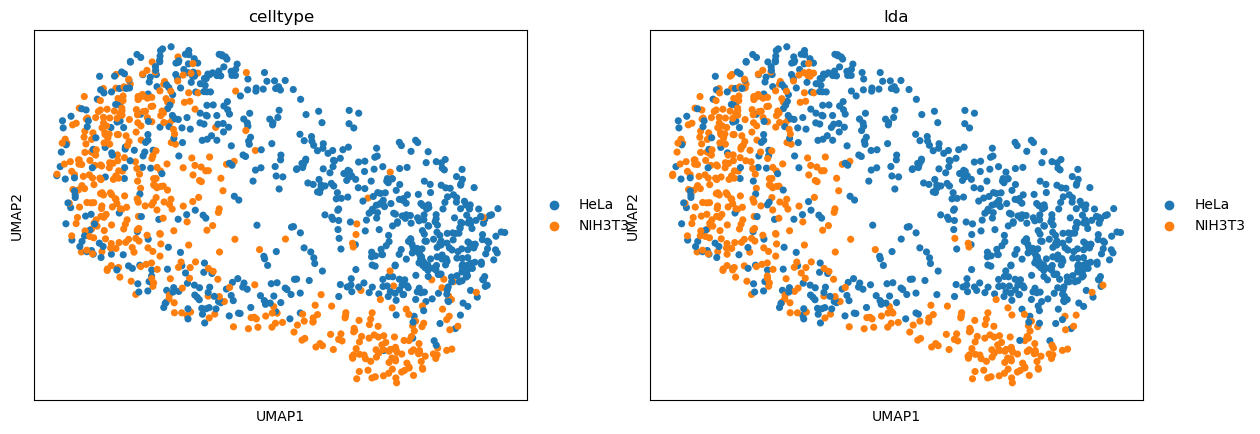

LDA accuracy after 10-fold cross-validation: 0.9174 (±0.0241)


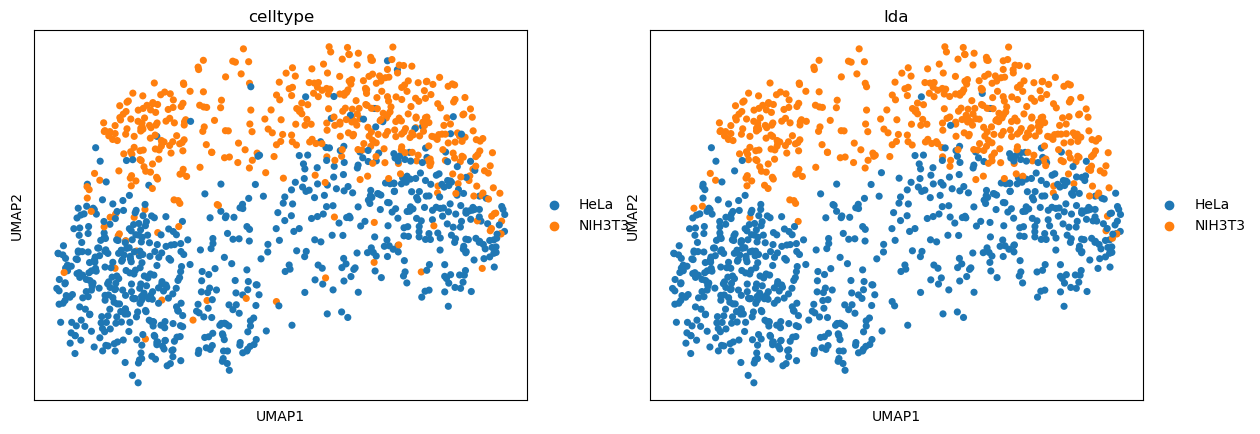

LDA accuracy after 10-fold cross-validation: 0.9134 (±0.0234)


In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

def LDA(adata):
    predictors = adata.X
    result = adata.obs['celltype']
    model = LinearDiscriminantAnalysis()
    model.fit(predictors, result)  

    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
    scores = cross_val_score(model, predictors, result, scoring='accuracy', cv=cv, n_jobs=10)
    
    adata.obs['lda'] = model.predict(adata.X)
    sc.pl.umap(adata, color=['celltype', 'lda'])
    print("LDA accuracy after 10-fold cross-validation: %1.4f (±%1.4f)" % (np.mean(scores), np.std(scores)))  


LDA(adata) 
LDA(adata_cor) 

In [18]:
from math import ceil
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from tqdm import tqdm


def intermixing_metric(adata, ax, label, n_datapoints = 100, normalized = False, n_jobs = 6):
    
    dist_matrix = distance_matrix(adata.obsm["X_umap"], adata.obsm["X_umap"])
    neighborhood_size = len(adata.obs)
    #sampling_range = np.unique(np.logspace(0, np.log10(neighborhood_size), n_datapoints).astype(int))
    sampling_range = range(1, neighborhood_size, ceil(neighborhood_size / n_datapoints))
    
    norm_factors = adata.obs['celltype'].value_counts() / len(adata.obs) * len(adata.obs['celltype'].value_counts())

    #neighborhood_df = pd.DataFrame(columns=sampling_range, index=adata.obs['ObjectNumber'])

    def get_neighborhood_series(index, celltype):
        neighbors = pd.Series(dist_matrix[index], index=adata.obs['celltype']).sort_values()
        if normalized: 
            return [neighbors[:i].index.value_counts()[celltype] / i / norm_factors[celltype]  for i in sampling_range]
        return [neighbors[:i].index.value_counts()[celltype] / i for i in sampling_range]

    neighborhood_df = pd.DataFrame(Parallel(n_jobs=n_jobs)(delayed(get_neighborhood_series)(index, celltype) for index, celltype in tqdm(enumerate(adata.obs['celltype']))),
                                              columns=sampling_range, index=adata.obs['ObjectNumber'])
    
    summary = pd.concat([neighborhood_df.mean(axis=0), neighborhood_df.std(axis=0)], axis=1)
    summary.columns = ["mean", "sd"]
    summary['neighborhood'] = np.linspace(0, 1, len(summary))

    ax.plot(summary.neighborhood, summary['mean'], label=label)
    #ax.fill_between(summary.index, (summary['mean'] - summary['sd']), summary['mean'] + summary['sd'], alpha=0.2)
    ax.set_ylim(0, 1.05)
    # ax.set_xscale('log')
    ax.set_xlabel('Neighborhood size')
    ax.set_ylabel('Cluster uniformity')
    



1137it [00:35, 31.77it/s]
1137it [00:19, 58.61it/s]


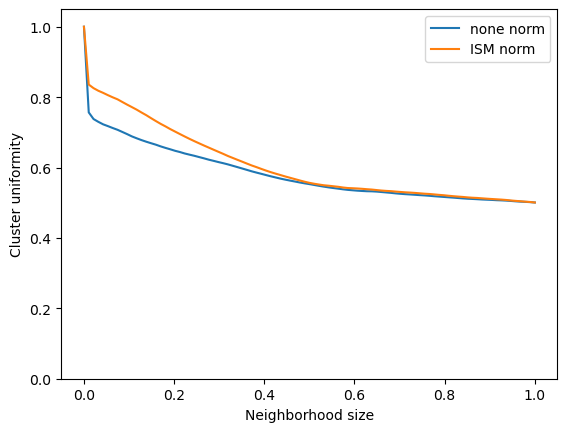

In [19]:

fig, ax = plt.subplots()

# intermixing_metric(adata, ax, 'none')
# intermixing_metric(adata_cor, ax, 'ISM')
intermixing_metric(adata, ax, 'none norm', normalized=True)
intermixing_metric(adata_cor, ax, 'ISM norm', normalized=True)

ax.legend()